In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [204]:
m_train_data= pd.read_csv("C:/Users/user/Desktop/train.csv")
m_test_data= pd.read_csv("C:/Users/user/Desktop/test.csv")

In [205]:
#explore the train dataset
m_train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [206]:
#explore the test data set
m_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [207]:
# Assume 'price_range' is the column to predict
X_train = m_train_data  # Replace 'price_range' with your actual target column name
y_train = m_train_data['price_range']
X_test = m_test_data  # Replace 'price_range' with your actual 'price_range' column name
y_test = m_train_data['price_range']

In [208]:
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [209]:
#make predictions
y_predict = model_dt.predict(X_train)

In [210]:
r2 = r2_score(y_predict, y_test)
print(r2)

1.0


In [211]:
model_LR= LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [212]:
#accuracy score
accuracy = accuracy_score(y_train, y_predict)
print("Accuracy Score:")
print(accuracy)


Accuracy Score:
1.0


In [213]:
# For multi-class classification, use average parameter
f1_macro = f1_score(y_train, y_predict, average='macro')
print(f"F1 Score (Macro Average): {f1_macro:.2f}")

F1 Score (Macro Average): 1.00


Checking for the Recall score of data

In [214]:
# Split data into test,train and target
X = m_train_data
y = m_train_data['price_range']

In [215]:
# Initialize and train RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [224]:
# Predict on the test set
y_predict = model_rf.predict(X_test)
print(y_predict)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 3 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 2 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 0 3 1 2 0
 0 1 0 2 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 0 2 2 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 2 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 0 1 3 1 2 0 2 2 

In [225]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)

In [226]:
# Predict on training and test sets
y_train_predict = model_rf.predict(X_train)
y_test_predict = model_rf.predict(X_test)


In [227]:
# Compute recall for each class
recall_train = recall_score(y_train, y_train_predict, average=None, labels=np.unique(y))
recall_test = recall_score(y_test, y_test_predict, average=None, labels=np.unique(y))


In [228]:
# Compute macro, micro, and weighted recall for training and test sets
macro_recall_train = recall_score(y_train, y_train_predict, average='macro')
micro_recall_train = recall_score(y_train, y_train_predict, average='micro')
weighted_recall_train = recall_score(y_train, y_train_predict, average='weighted')

In [229]:
macro_recall_test = recall_score(y_test, y_test_predict, average='macro')
micro_recall_test = recall_score(y_test, y_test_predict, average='micro')
weighted_recall_test = recall_score(y_test, y_test_predict, average='weighted')


In [230]:
# Print recall scores
print("Training Recall Scores for each class:", recall_train)
print("Test Recall Scores for each class:", recall_test)

print(f"Training Macro-Averaged Recall: {macro_recall_train:.2f}")
print(f"Training Micro-Averaged Recall: {micro_recall_train:.2f}")
print(f"Training Weighted-Averaged Recall: {weighted_recall_train:.2f}")

print(f"Test Macro-Averaged Recall: {macro_recall_test:.2f}")
print(f"Test Micro-Averaged Recall: {micro_recall_test:.2f}")
print(f"Test Weighted-Averaged Recall: {weighted_recall_test:.2f}")


Training Recall Scores for each class: [1. 1. 1. 1.]
Test Recall Scores for each class: [1. 1. 1. 1.]
Training Macro-Averaged Recall: 1.00
Training Micro-Averaged Recall: 1.00
Training Weighted-Averaged Recall: 1.00
Test Macro-Averaged Recall: 1.00
Test Micro-Averaged Recall: 1.00
Test Weighted-Averaged Recall: 1.00


Showing/Solving for the Confusion matrix

In [231]:
#Confusion matrix
cm= confusion_matrix(y_test, y_predict)
print(cm)

[[151   0   0   0]
 [  0 146   0   0]
 [  0   0 148   0]
 [  0   0   0 155]]


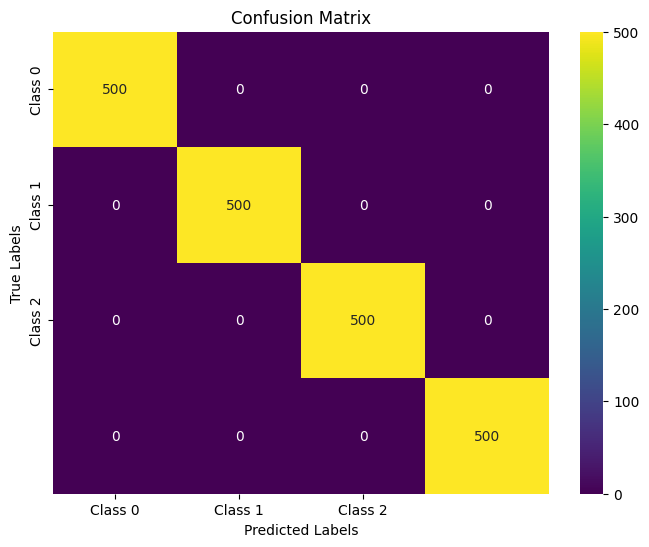

In [223]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Showing a Boxplot of Sample data

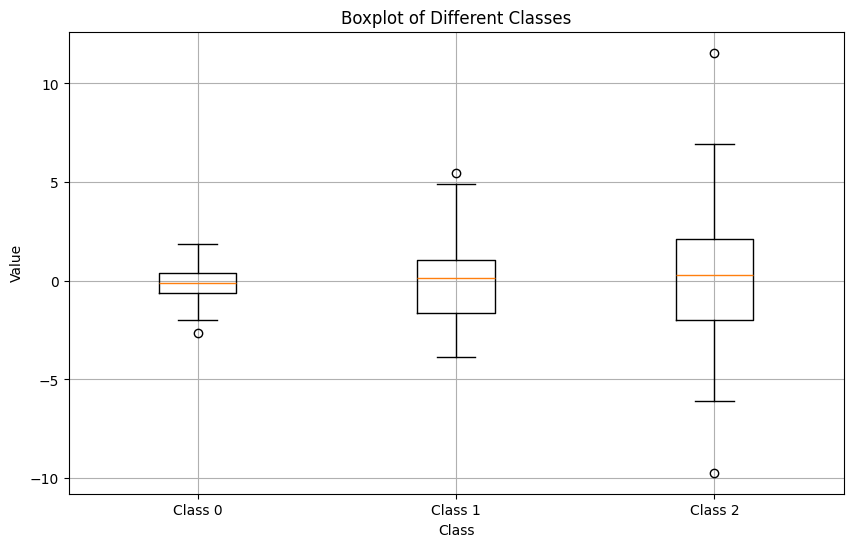

In [162]:
# Sample data
np.random.seed(42)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Boxplot of Different Classes')
plt.xlabel('Class')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [163]:
# Sample data
X = m_train_data

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

print("Standardized Data:\n", X_scaled)

Standardized Data:
 [[-0.90259726 -0.9900495   0.83077942 ... -1.00601811  0.98609664
  -0.4472136 ]
 [-0.49513857  1.0100505  -1.2530642  ...  0.99401789 -1.01409939
   0.4472136 ]
 [-1.5376865   1.0100505  -1.2530642  ...  0.99401789 -1.01409939
   0.4472136 ]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.99401789 -1.01409939
   1.34164079]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.99401789  0.98609664
  -1.34164079]
 [-1.65833069  1.0100505   0.58562134 ...  0.99401789  0.98609664
   1.34164079]]


Using XGB Classifier

In [164]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score

In [165]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [166]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    eval_metric='mlogloss',      # Logarithmic loss for multi-class classification
    use_label_encoder=False,     # Avoid warning for deprecation
    n_estimators=100,            # Number of boosting rounds
    max_depth=3,                 # Maximum depth of a tree
    learning_rate=0.1            # Step size shrinkage
)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [168]:
# Predict on test set
y_predict = model.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_predict, target_names=iris.target_names))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


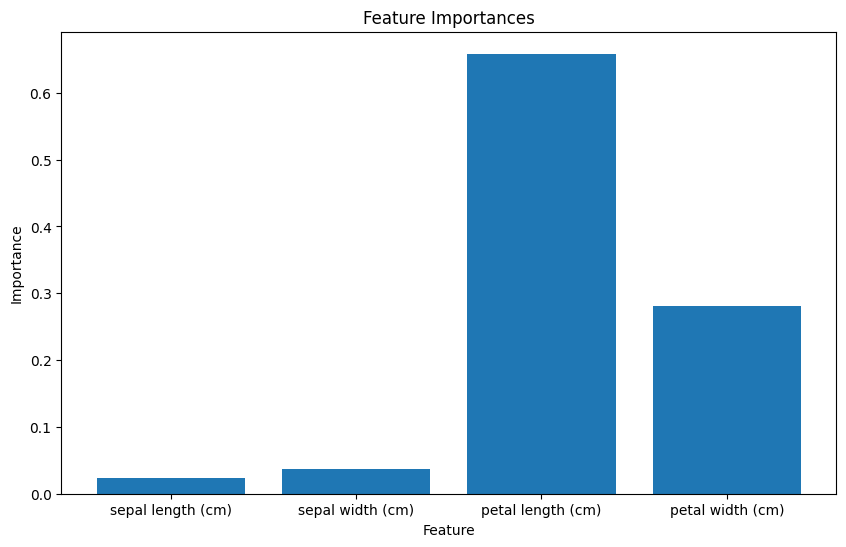

In [169]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, tick_label=iris.feature_names)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Model Tuning

In [170]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best model
y_predict_best = grid_search.best_estimator_.predict(X_test)

# Print the classification report for the best model
print("Best Model Classification Report:\n", classification_report(y_test, y_predict_best, target_names=iris.target_names))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.9333333333333332
Best Model Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

